In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Download monthly data for SSE Composite Index (000001.SS)
symbol = '000001.SS'
data = yf.download(symbol, interval='1mo', start='1980-01-01')
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open    Volume
Ticker        000001.SS    000001.SS    000001.SS    000001.SS 000001.SS
Date                                                                    
1997-07-01  1189.760010  1261.571045  1066.043945  1255.909058         0
1997-08-01  1221.063965  1223.071045  1116.147949  1191.651001         0
1997-09-01  1097.383057  1264.489014  1025.130005  1224.177002         0
1997-10-01  1180.392944  1241.833008  1087.017944  1100.699951         0
1997-11-01  1139.628052  1213.228027  1114.137939  1181.161987         0


In [28]:
# Calculate the moving averages
data['5_Month_MA'] = data['Close'].rolling(window=5).mean()
data['10_Month_MA'] = data['Close'].rolling(window=10).mean()
data['20_Month_MA'] = data['Close'].rolling(window=20).mean()
data['30_Month_MA'] = data['Close'].rolling(window=30).mean()
data['60_Month_MA'] = data['Close'].rolling(window=60).mean()
data['120_Month_MA'] = data['Close'].rolling(window=120).mean()
data['233_Month_MA'] = data['Close'].rolling(window=233).mean()

In [29]:
%pip install plotly

import plotly.graph_objects as go

# Assuming your DataFrame is called 'data' and has 'Open', 'High', 'Low', and 'Close' columns
fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],  # Assuming 'Date' column exists in your data
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name='Candlestick Chart'
)])

# Plot the moving averages on top of the candlestick chart
fig.add_trace(go.Scatter(x=data['Date'], y=data['60_Month_MA'], mode='lines', name='60-Month MA', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['120_Month_MA'], mode='lines', name='120-Month MA', line=dict(color='teal', dash='dash')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['233_Month_MA'], mode='lines', name='233-Month MA', line=dict(color='orange', dash='dash')))

# Update layout to add titles and labels
fig.update_layout(
    title='SSE Composite Index with Moving Averages',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Hide the range slider
    template="plotly_dark"  # Optional: for a dark theme
)

# Show the plot
fig.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


KeyError: 'Date'

In [3]:
# Calculate the monthly difference of the moving averages
data['5_Month_MA_Slope'] = data['5_Month_MA'].diff()
data['10_Month_MA_Slope'] = data['10_Month_MA'].diff()
data['20_Month_MA_Slope'] = data['20_Month_MA'].diff()
data['30_Month_MA_Slope'] = data['30_Month_MA'].diff()
data['60_Month_MA_Slope'] = data['60_Month_MA'].diff()
data['120_Month_MA_Slope'] = data['120_Month_MA'].diff()
data['233_Month_MA_Slope'] = data['233_Month_MA'].diff()

NameError: name 'data' is not defined

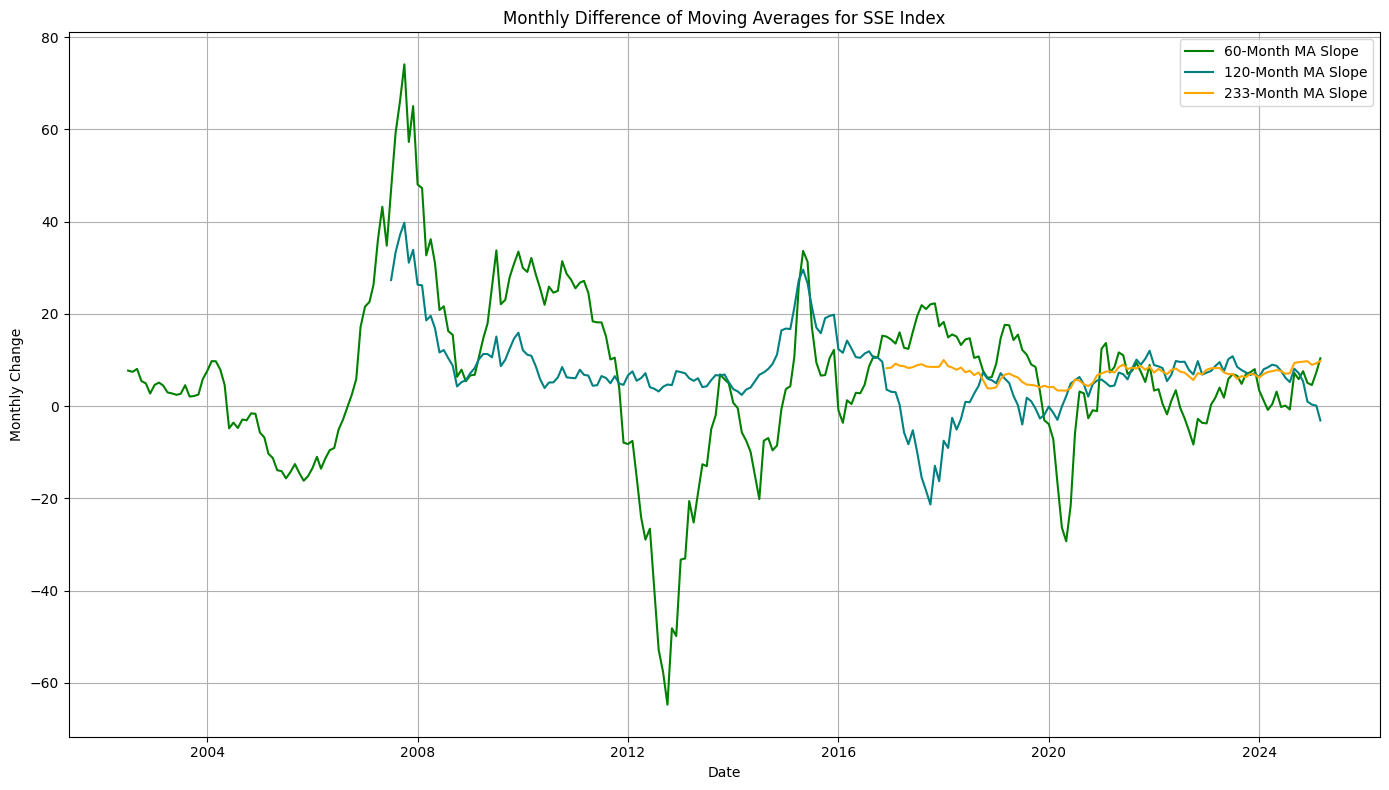

In [36]:
# Plot the rate of change (slope) of the moving averages
plt.figure(figsize=(14, 8))
#plt.plot(data['5_Month_MA_Slope'], label='5-Month MA Slope', color='red', linestyle='-')
#plt.plot(data['10_Month_MA_Slope'], label='10-Month MA Slope', color='purple', linestyle='-')
#plt.plot(data['20_Month_MA_Slope'], label='20-Month MA Slope', color='brown', linestyle='-')
#plt.plot(data['30_Month_MA_Slope'], label='30-Month MA Slope', color='pink', linestyle='-')
plt.plot(data['60_Month_MA_Slope'], label='60-Month MA Slope', color='green', linestyle='-')
plt.plot(data['120_Month_MA_Slope'], label='120-Month MA Slope', color='teal', linestyle='-')
plt.plot(data['233_Month_MA_Slope'], label='233-Month MA Slope', color='orange', linestyle='-')

# Adding labels and title
plt.title('Monthly Difference of Moving Averages for SSE Index')
plt.xlabel('Date')
plt.ylabel('Monthly Change')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [38]:
# Calculate the percentage change of the moving averages
data['5_Month_MA_Percent_Change'] = data['5_Month_MA'].pct_change() * 100
data['10_Month_MA_Percent_Change'] = data['10_Month_MA'].pct_change() * 100
data['20_Month_MA_Percent_Change'] = data['20_Month_MA'].pct_change() * 100
data['30_Month_MA_Percent_Change'] = data['30_Month_MA'].pct_change() * 100
data['60_Month_MA_Percent_Change'] = data['60_Month_MA'].pct_change() * 100
data['120_Month_MA_Percent_Change'] = data['120_Month_MA'].pct_change() * 100
data['233_Month_MA_Percent_Change'] = data['233_Month_MA'].pct_change() * 100

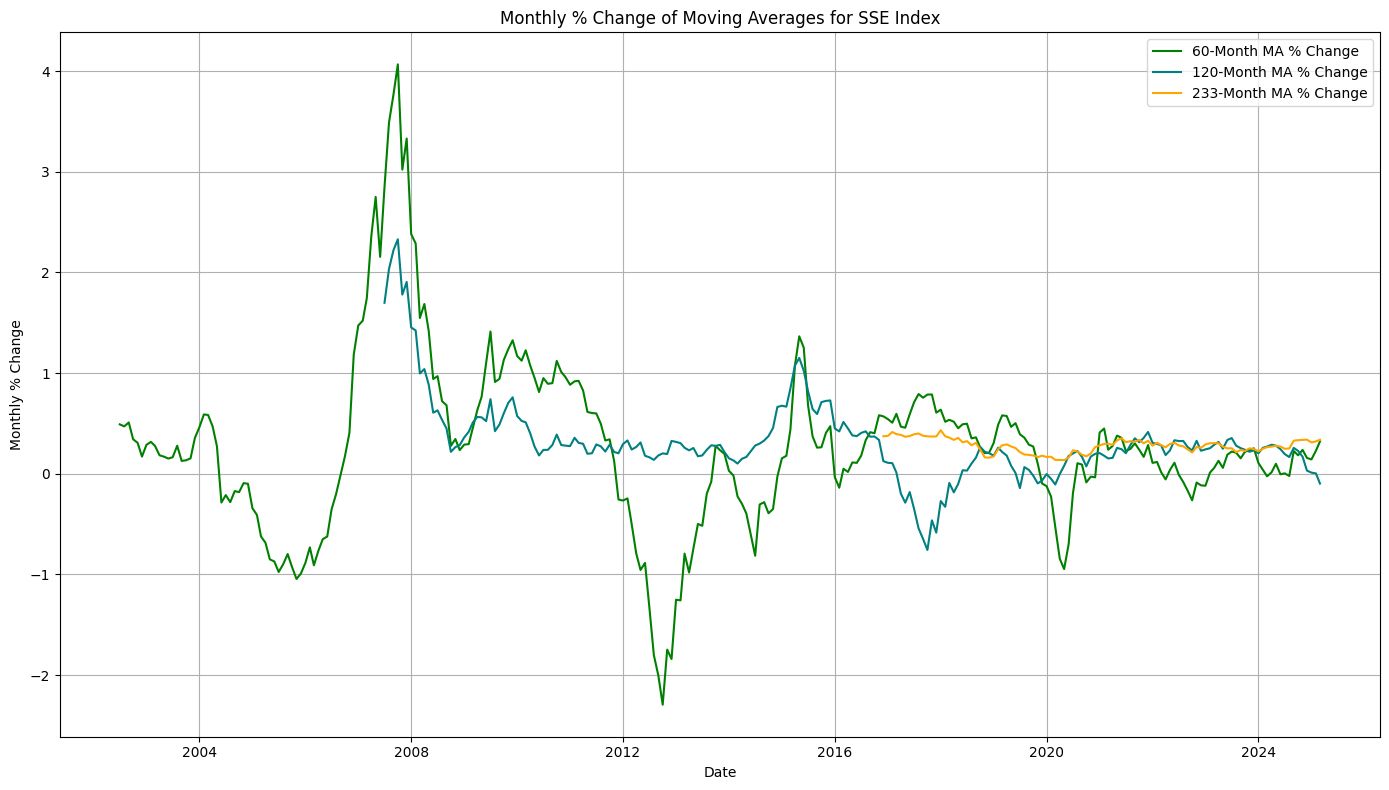

In [39]:
# Plot the rate of change (slope) of the moving averages
plt.figure(figsize=(14, 8))
#plt.plot(data['5_Month_MA_Percent_Change'], label='5-Month MA % Change', color='red', linestyle='-')
#plt.plot(data['10_Month_MA_Percent_Change'], label='10-Month MA % Change', color='purple', linestyle='-')
#plt.plot(data['20_Month_MA_Percent_Change'], label='20-Month MA % Change', color='brown', linestyle='-')
#plt.plot(data['30_Month_MA_Percent_Change'], label='30-Month MA % Change', color='pink', linestyle='-')
plt.plot(data['60_Month_MA_Percent_Change'], label='60-Month MA % Change', color='green', linestyle='-')
plt.plot(data['120_Month_MA_Percent_Change'], label='120-Month MA % Change', color='teal', linestyle='-')
plt.plot(data['233_Month_MA_Percent_Change'], label='233-Month MA % Change', color='orange', linestyle='-')

# Adding labels and title
plt.title('Monthly % Change of Moving Averages for SSE Index')
plt.xlabel('Date')
plt.ylabel('Monthly % Change')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [41]:
data.to_csv("results/sse.csv")